这是处理cube、fits的一些简单示例。有问题或者bug欢迎联系stellarxu@qq.com

2021/01/26 update

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# 如果找不到包
#import sys
#sys.path.append('../../../pkgs/hiviewer/') #这里是包的路径，临时添加到sys.path
#import hiviewer as FIO
from hiviewer import FitsPic
from hiviewer.overlap import overlap_img_contour,overlap_two_contours,two_contours_with_peaks
from hiviewer.HIsource_fio import HIsource

In [2]:
'''
# 如果没有beam infomation(resolution),需要增加header信息
from astropy.io import fits
hdl=fits.open('./fast/M33_FAST_cube.fits')
hd=hdl[0].header
print(hd)

hd['CTYPE3']='VELOCITY'#spectralcube 不可识别的要先转化一下
hd['BMAJ']=3/60
hd['BMIN']=3/60
hd['BPA']=0.0

fits.writeto('./fast/M33_FAST_cube_new.fits',hdl[0].data,hd,overwrite=True)
hdl.close()
'''

"\n# 如果没有beam infomation(resolution),需要增加header信息\nfrom astropy.io import fits\nhdl=fits.open('./fast/M33_FAST_cube.fits')\nhd=hdl[0].header\nprint(hd)\n\nhd['CTYPE3']='VELOCITY'#spectralcube 不可识别的要先转化一下\nhd['BMAJ']=3/60\nhd['BMIN']=3/60\nhd['BPA']=0.0\n\nfits.writeto('./fast/M33_FAST_cube_new.fits',hdl[0].data,hd,overwrite=True)\nhdl.close()\n"

In [2]:
fastcube = FitsPic('./fast/M33_FAST_cube_new.fits')
arbocube = FitsPic('../../arbo/M33_arecibo.fits')
#    Arecibo data: http://www.naic.edu/~ages/public_cubes/M33_local.fits.gz
#    and article: http://adsabs.harvard.edu/abs/2016MNRAS.456..951K
vlacube = FitsPic('../../VLA/M33_HI_12sec-area.fits')
#    VLA data and article: https://www.researchgate.net/publication/260025915_M33_HI_maps
optical = FitsPic('./data/MESSIER_033_I_103aE_dss1.fits')
#    from NED, photoed by Palomar Observatory.

# primary operation

In [3]:
fastcube.hd0

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   31                                                  
NAXIS2  =                   34                                                  
NAXIS3  =                 4471                                                  
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =                 16.0 / Pixel coordinate of reference point            
CRPIX2  =                 17.5 / Pixel coordinate of reference point            
CRPIX3  =               2236.0 / Pixel coordinate of reference point            
CDELT1  =   -0.050000000000001 / [deg] Coordinate increment at reference point  
CDELT2  =    0.050000000000001 / [deg] Coordinate increment at reference point  
CDELT3  =    -0.100641794522

In [4]:
print(fastcube.data.shape,fastcube.ndim)
print(fastcube.wcs_obj)

(4471, 34, 31) 3
WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---CAR'  'DEC--CAR'  'VELOCITY'  
CRVAL : 23.525  30.65  -174.98472414917  
CRPIX : 16.0  17.5  2236.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.050000000000001  0.050000000000001  -0.10064179452236  
NAXIS : 31  34  4471


In [5]:
fastcube.cube

SpectralCube with shape=(4471, 34, 31):
 n_x:     31  type_x: RA---CAR  unit_x: deg    range:    22.645724 deg:   24.404276 deg
 n_y:     34  type_y: DEC--CAR  unit_y: deg    range:    29.822116 deg:   31.472066 deg
 n_s:   4471  type_s: VELO      unit_s: m / s  range:  -399919.135 m / s:   49949.687 m / s

In [6]:
fastcube.velo

<Quantity [  49949.6866083 ,   49849.04481378,   49748.40301926, ...,
           -399717.8513176 , -399818.49311212, -399919.13490664] m / s>

In [7]:
fastcube.cdelt[1]

0.050000000000001

In [8]:
arbocube.beam #arecibo resolution 3.5'

Beam: BMAJ=204.0119960904 arcsec BMIN=204.0119960904 arcsec BPA=0.0 deg

In [9]:
print(f'{fastcube.beam}, {vlacube.beam}')

8.628974074672004e-07 sr, 3.7156653504257507e-09 sr


In [5]:
# 坐标转换
px,py = fastcube.deg2pix(ra = 23.5,dec = 30)# 内部是四舍五入取一个最近的pixel
print(px,py)
ra,dec = fastcube.pix2deg(px,py)
print(ra,dec)
from hiviewer.utils import coord2str
coord2str(ra,dec,output='hmsdms',frame='icrs')

15 4
23.525000000000006 30.024999999999984


'01h34m06s +30d01m30s'

## moment maps and plot

In [11]:
help(fastcube.slab_moment)

Help on method slab_moment in module hiviewer.core:

slab_moment(v1, v2, filepath, m0=True, m1=False, m2=False) method of hiviewer.core.FitsPic instance
    Only for 3D cubes
    slab velocity from v1 km/s to v2 km/s.
        eg. For M33, v1 = -300km/s and v2 = -50km/s , like this
        
    You can choose to compute  3 moment maps. m0, m1 and m2.
    These new 2D maps will be saved as new FITS files.



In [12]:
fastcube.slab_moment(v1=-300,v2=-50,filepath='./data/fast',m0=True,m1=True)

INFO: Producing moment maps.Slab velocity :-300km/s and -50km/s.  [hiviewer.core]
INFO:  saved ./data/fast_HI-moment0.fits  [hiviewer.core]
INFO:  saved ./data/fast_HI-moment1.fits  [hiviewer.core]


In [13]:
arbocube.slab_moment(v1=-300,v2=-50,filepath='./data/arbo',m0=True)

INFO: Producing moment maps.Slab velocity :-300km/s and -50km/s.  [hiviewer.core]
INFO:  saved ./data/arbo_HI-moment0.fits  [hiviewer.core]


In [3]:
fastm0 = FitsPic('./data/fast_HI-moment0.fits')

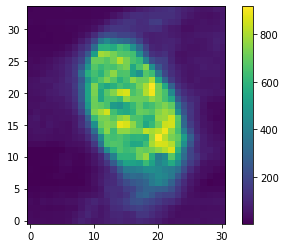

In [4]:
plt.imshow(fastm0.data,origin = 'lower')
plt.colorbar()

plot slice at velocity -150 km/s
The 3rd parameter is -150025.55910762472 m / s


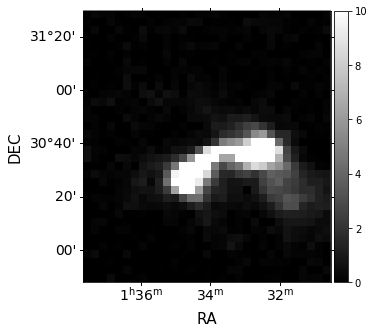

In [16]:
# 画cube中的一片
sel = fastcube.velo2sel(-150)
print(f"plot slice at velocity -150 km/s")
fastcube.plot_slice(figsize=(6,5),vmin_max=(0,10),sel=sel,cmap = 'gray',picname = './fig/M33',save=True)

In [17]:
help(fastm0.plot_slice)
# 可以改coord_format，现在的code是ra和dec格式统一，可以再改core.py

Help on method plot_slice in module hiviewer.core:

plot_slice(vmin_max=None, sel=0, cmap='gray', figsize=(9, 6), picname='./', coord_format=None, save=True) method of hiviewer.core.FitsPic instance
    select which slice you want.It will show a slice image.
    Or use #self.cube[sel,:,:].quicklook()#
            The syntax for the format string is the following:
                    format  result
                    'dd'    '15d'
                    'dd:mm' '15d24m'
                    'dd:mm:ss'      '15d23m32s'
                    'dd:mm:ss.s'    '15d23m32.0s'
                    'dd:mm:ss.ssss' '15d23m32.0316s'
                    'hh'    '1h'
                    'hh:mm' '1h02m'
                    'hh:mm:ss'      '1h01m34s'
                    'hh:mm:ss.s'    '1h01m34.1s'
                    'hh:mm:ss.ssss' '1h01m34.1354s'
                    'd'     '15'
                    'd.d'   '15.4'
                    'd.dd'  '15.39'
                    'd.ddd' '15.392'
                   

Showing image.


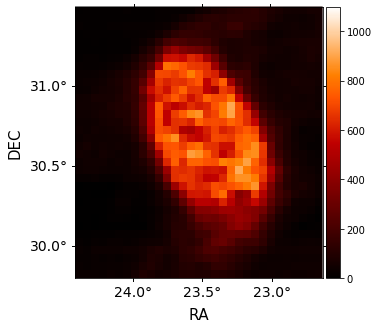

In [18]:
fastm0.plot_slice(figsize=(6,5),vmin_max=(0,1100),cmap = 'gist_heat',picname = './fig/M33',
                  coord_format='d.d')

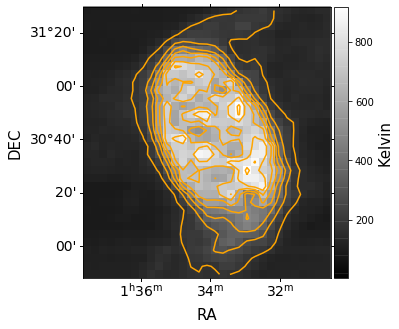

In [19]:
fastm0.plot_contour(figsize=(6,5),levels=np.linspace(100,1000,9),alpha=0.9,clabel=False,
                    cbar_label='Kelvin', picname ='./fig/M33',save = True)

The fixed ra is nearly 23.23425314153394deg


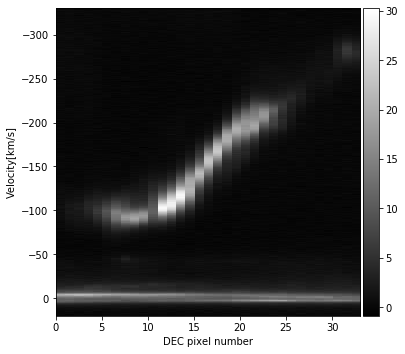

In [7]:
# 画cube侧面的图，固定一个大致的ra
fastcube.plot_side_slice(sel = 20,axis=2,cmap = 'gray',figsize=(6,5),xylim=[0,33,20,-330])

The fixed dec is nearly 30.824987048539302deg


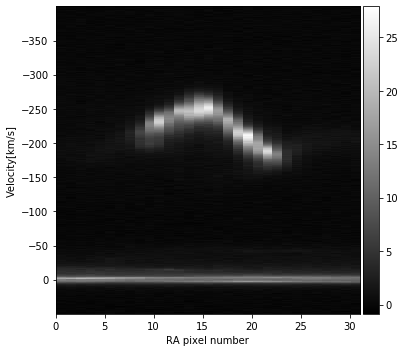

In [5]:
# 画cube侧面的图，固定一个大致的dec
fastcube.plot_side_slice(sel = 20,axis=1,cmap = 'gray',figsize=(6,5))

contour level to fit: 918.220 * 0.5
fitting contour 0
Found a near-center ellipse :D  hhh

========= Fit results ellipse model ==========
Center pixel: [15.919752139895994, 17.55833726090108]
SemiMajor pixel: 6.523151965106676
SemiMinor pixel: 10.49975465303469
Phi rad: 0.48979090075353104
=============== Fit Finished ===================


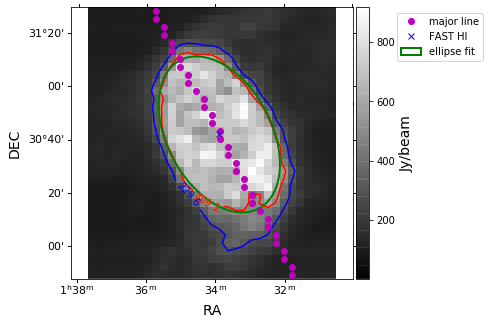

In [4]:
# 用等高线拟合椭圆，画出长轴
HIso = HIsource(fastcube,fastm0)
his = HIso.fit_contour(factor = 0.5,clabel=True,plot_major_line=True)

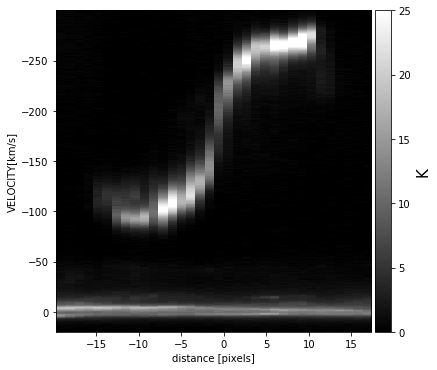

In [6]:
his.plot_maj_slice(figsize=(6,5),vmin_max=[0,25],vrange=[-300,20],cmap='gray')

# Inspect a Spectrum

ra=23,dec=30.5, px,py=(24, 14)


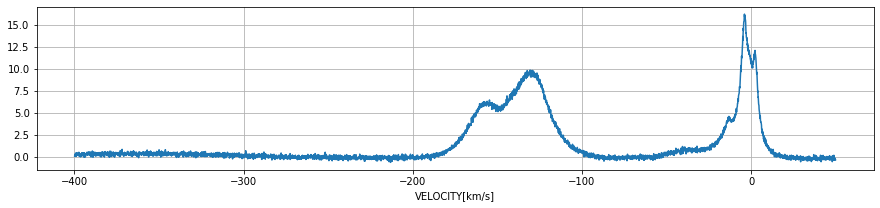

ra=23.002604234747764,dec=30.523954193325658, px,py=(24, 14)


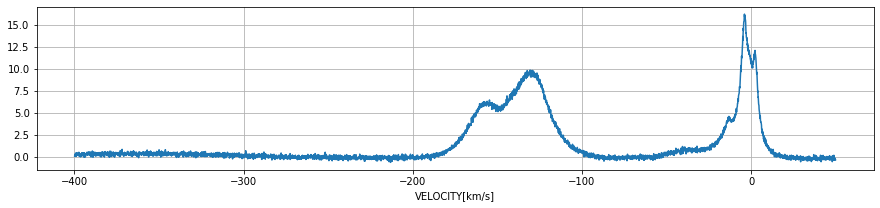

In [5]:
ra=23;dec=30.5
px=24;py=14
fastcube.plot_spec(ra,dec,coord_type='radec')#default 
fastcube.plot_spec(px,py,coord_type='pixel')

ra=23.0,dec=30.4, px,py=(24, 12)


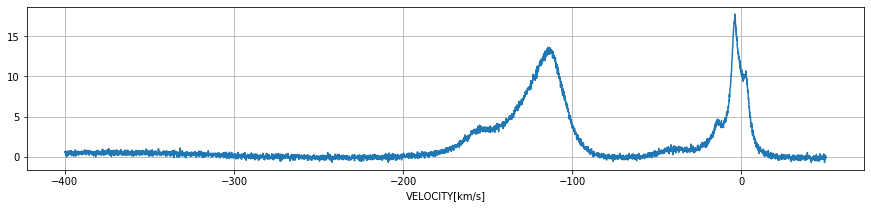

ra=23.0,dec=31.0, px,py=(24, 24)


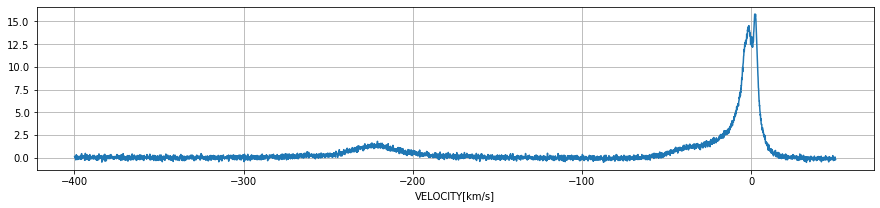

ra=23.5,dec=30.4, px,py=(15, 12)


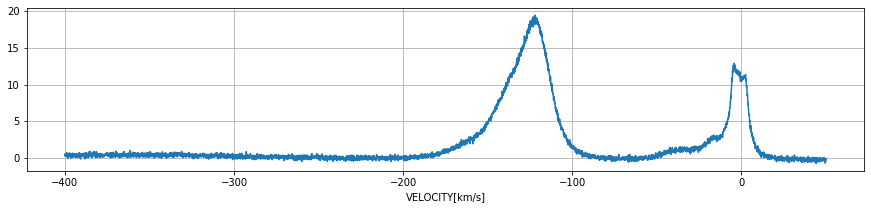

ra=23.5,dec=31.0, px,py=(15, 24)


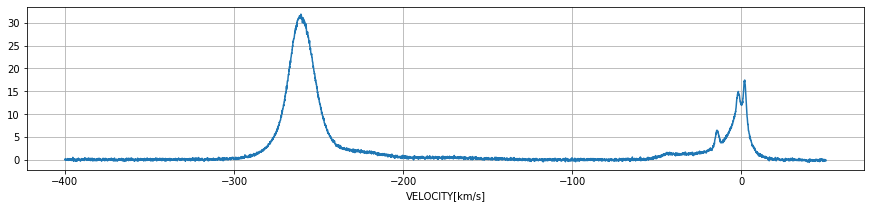

In [4]:
ra=np.linspace(23.0,23.5,2)#deg
dec=np.linspace(30.4,31.0,2)
for i in range(len(ra)):
    for j in range(len(dec)):
        fastcube.plot_spec(ra[i],dec[j],picname = f'./fig/fast_{i}_{j}')
        #may be many spectrum pics...

# convolve and reproject

In [24]:
help(fastcube.spcube_convolve_reproj)

Help on method spcube_convolve_reproj in module hiviewer.core:

spcube_convolve_reproj(reproj_target, beam_target, v1, v2, fitsname) method of hiviewer.core.FitsPic instance
    We use package montage to reproject self to reproj_target shape. In this process, the pixel 
    size will be the same as reproject target.Then use convolve_to in SpectralCube to convolve 
    beam to the target beam. 
    
    Read the fits header to get beam infomation.If it doesn't has,there will be a warning. Just 
    add a beam on the header.
    
    
    Parameters
    ------------
    self,reproj_target,beam_target: FitsPic Class Object.
    v1,v2: slab moment 0 , from v1 to v2. the same as slab_moment
    fitsname :str.The result fits will be named as [fitsname+'_convolve_reproj_result.fits']
    
    REMEMBER the 'self' object must have 3 or 4 dimensions.In another words, it is a cube!
    reproj_target should be 2D FitsPics.
    beam_target can be 2D/3D/4D FitsPics.



In [25]:
#resolution and pixel size
print(fastcube.beam,fastcube.cdelt)
print(arbocube.beam,arbocube.cdelt)
print(vlacube.beam,vlacube.cdelt)

Beam: BMAJ=180.0 arcsec BMIN=180.0 arcsec BPA=0.0 deg [-0.05        0.05       -0.10064179]
Beam: BMAJ=204.0119960904 arcsec BMIN=204.0119960904 arcsec BPA=0.0 deg [-1.66666667e-02  1.66666667e-02 -5.14726510e+03]
Beam: BMAJ=11.987157583929601 arcsec BMIN=11.638746899622 arcsec BPA=-31.85496410019 deg [-1.11111111e-03  1.11111111e-03 -1.28813923e+03  1.00000000e+00]


In [3]:
arbom0 = FitsPic('./data/arbo_HI-moment0.fits')
fastm0 = FitsPic('./data/fast_HI-moment0.fits')

## 举例：使用不同的方法，卷积到arbocube的分辨率，重新投影到fastm0上
把三者统一成最低的分辨率（这里采用了arbocube，或者任意arbo的）和最大的格点大小（fastm0）。

三维：reproj_convolve_cube

二维：reproj_convolve_2D

reproject methods：
* montage
* kaptyne
* reproject

In [5]:
# 将4维(1, 1, 1201, 811)的cube当作2维moment0，卷积并重新投影
vlacube = FitsPic('../../VLA/M33_HI_12sec-area.fits')
vlacube.reproj_convolve_cube(fastm0,arbocube,fitsname='./data/vla_montage',method='montage')

./data/vla_montage_convolve_reproj_result.fits already exsist.Delete it...


Its data shape is (1, 1, 1201, 811).So don't slab moment 0. 
INFO: Reprojecting the moment0 of the cube... [hiviewer.core]
INFO: Deleting work directory /tmp/tmpc0fe4wte [montage_wrapper.wrappers]
INFO:  Create a new fits file ./data/vla_montage_convolve_reproj_result.fits [hiviewer.core]


In [6]:
vlacube = FitsPic('../../VLA/M33_HI_12sec-area.fits')
vlacube.reproj_convolve_cube(fastm0,arbocube,fitsname='./data/vla_kapteyn',method='kapteyn')

./data/vla_kapteyn_convolve_reproj_result.fits already exsist.Delete it...


Its data shape is (1, 1, 1201, 811).So don't slab moment 0. 
INFO: Reprojecting the moment0 of the cube... [hiviewer.core]
INFO:  Create a new fits file ./data/vla_kapteyn_convolve_reproj_result.fits [hiviewer.core]


In [7]:
vlacube = FitsPic('../../VLA/M33_HI_12sec-area.fits')
vlacube.reproj_convolve_cube(fastm0,arbocube,fitsname='./data/vla_reproject',method='reproject')

./data/vla_reproject_convolve_reproj_result.fits already exsist.Delete it...


Its data shape is (1, 1, 1201, 811).So don't slab moment 0. 
INFO: Reprojecting the moment0 of the cube... [hiviewer.core]
INFO:  Create a new fits file ./data/vla_reproject_convolve_reproj_result.fits [hiviewer.core]


In [8]:
# 比较三种方法
vm = FitsPic('./data/vla_montage_convolve_reproj_result.fits')
vk = FitsPic('./data/vla_kapteyn_convolve_reproj_result.fits')
vr = FitsPic('./data/vla_reproject_convolve_reproj_result.fits')

Showing image.


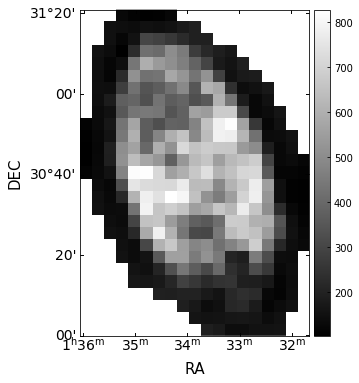

In [9]:
vm.plot_slice(save = False)

In [45]:
vk.plot_slice(save = False)

Showing image.


In [16]:
vr.plot_slice(save = False)

Showing image.


In [105]:
# 3维的数据但是这个只需要卷积，得到moment0，所以需要slab_moment的参数v1=-300,v2=-50
fastcube.reproj_convolve_cube(fastm0,arbocube,v1=-300,v2=-50,fitsname='./data/fast_reproject',method='reproject')

./data/fast_reproject_convolve_reproj_result.fits already exsist.Delete it...


Producing convolved moment 0 from the cube.Slab velocity :-300km/s and -50km/s. 
INFO: Reprojecting the moment0 of the cube... [unknown]
INFO:  Create a new fits file ./data/fast_reproject_convolve_reproj_result.fits [unknown]


In [122]:
# 整个cube投影到另一个上，可能需要较长时间，这里示例的keyboard中止了
arbocube.reproj_convolve_cube(fastcube,arbocube,slabm0=False,fitsname='./data/arbocube2fastcube_',method='montage')

INFO: Reprojecting the whole cube... [unknown]
389
388
387
386
385
384
383
382
381
380
379
378
377
376
375
374
373
372
371
370
369
368
367
366
365
364
363


KeyboardInterrupt: 

In [11]:
# 二维对象适用reproj_convolve_2D，依赖astropy的卷积和montage/kapteyn/reproject的方法
arbom0 = FitsPic('./data/arbo_HI-moment0.fits')
arbom0.reproj_convolve_2D(fastm0,arbocube,fitsname='./data/arbo_astropy_kapteyn',method='kapteyn')
#arbom0.reproj_convolve_2D(fastm0,arbocube,fitsname='./data/arbo_astropy_reproject',method='reproject')
#arbom0.reproj_convolve_2D(fastm0,arbocube,fitsname='./data/arbo_astropy_montage',method='montage')

./data/arbo_astropy_kapteyn_reproj.fits already exsist.Delete it...
INFO:  Create a new fits file named ./data/arbo_astropy_kapteyn_reproj.fits [hiviewer.core]


In [4]:
# 以下结果都作出一个moment0，所以要求对象是三维的cube。以使用默认的montage方法为例。
fastcube.reproj_convolve_cube(fastm0,arbocube,v1=-300,v2=-50,fitsname='./data/fast')
arbocube.reproj_convolve_cube(fastm0,arbocube,v1=-300,v2=-50,fitsname='./data/arbo')
vlacube.reproj_convolve_cube(fastm0,arbocube,fitsname='./data/vla')

./data/fast_convolve_reproj_result.fits already exsist.Delete it...


Producing convolved moment 0 from the cube.Slab velocity :-300km/s and -50km/s. 
INFO: Reprojecting the moment0 of the cube... [hiviewer.core]
INFO: Deleting work directory /tmp/tmpgkt8agif [montage_wrapper.wrappers]
INFO:  Create a new fits file ./data/fast_convolve_reproj_result.fits [hiviewer.core]
./data/arbo_convolve_reproj_result.fits already exsist.Delete it...
Producing convolved moment 0 from the cube.Slab velocity :-300km/s and -50km/s. 


INFO: Reprojecting the moment0 of the cube... [hiviewer.core]
INFO: Deleting work directory /tmp/tmpae0r6_ua [montage_wrapper.wrappers]
INFO:  Create a new fits file ./data/arbo_convolve_reproj_result.fits [hiviewer.core]
./data/vla_convolve_reproj_result.fits already exsist.Delete it...


Its data shape is (1, 1, 1201, 811).So don't slab moment 0. 
INFO: Reprojecting the moment0 of the cube... [hiviewer.core]
INFO: Deleting work directory /tmp/tmp6u83e9pr [montage_wrapper.wrappers]
INFO:  Create a new fits file ./data/vla_convolve_reproj_result.fits [hiviewer.core]


In [6]:
#using these to compare
arbo = FitsPic('./data/arbo_convolve_reproj_result.fits')
fast =FitsPic('./data/fast_convolve_reproj_result.fits')
vla= FitsPic('./data/vla_convolve_reproj_result.fits')

In [29]:
print(fast.data.shape,arbo.data.shape,vla.data.shape)
# shape不是完全一样，因为原始数据区域覆盖的就不一样

(33, 31) (34, 31) (27, 19)


In [6]:
arbo.hd0

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   31                                                  
NAXIS2  =                   34                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
EQUINOX =               2000.0                                                  
LINE    = 'HI      '                                                            
BMAJ    =       0.056669998914                                                  
BMIN    =       0.056669998914                                                  
BPA     =                  0

In [7]:
vla.hd0

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   19                                                  
NAXIS2  =                   27                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
EQUINOX =               2000.0                                                  
LINE    = 'HI      '                                                            
BMAJ    =       0.056669998914                                                  
BMIN    =       0.056669998914                                                  
BPA     =                  0

In [8]:
fast.hd0

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   31                                                  
NAXIS2  =                   33                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
EQUINOX =               2000.0                                                  
LINE    = 'HI      '                                                            
BMAJ    =       0.056669998914                                                  
BMIN    =       0.056669998914                                                  
BPA     =                  0

# compare and overlap

In [7]:
#人工选择的contour levels
alevels=(158.4-np.logspace(1.83,2.09,23))[::-1]
flevels=(1120-np.logspace(1.9,2.8,23))[::-1]
vlevels=(1100-np.logspace(2.2,3.06,17))[::-1]
print(f"arbo levels:{alevels}")
print(f"fast levels:{alevels}")
print(f"vla levels:{vlevels}")

arbo levels:[35.37312292 38.67583462 41.88988354 45.01764988 48.06144993 51.02353779
 53.90610709 56.71129251 59.44117148 62.09776562 64.6830423  67.19891606
 69.64725007 72.02985745 74.34850267 76.60490282 78.80072889 80.93760703
 83.01711972 85.04080695 87.01016739 88.92665947 90.79170246]
fast levels:[35.37312292 38.67583462 41.88988354 45.01764988 48.06144993 51.02353779
 53.90610709 56.71129251 59.44117148 62.09776562 64.6830423  67.19891606
 69.64725007 72.02985745 74.34850267 76.60490282 78.80072889 80.93760703
 83.01711972 85.04080695 87.01016739 88.92665947 90.79170246]
vla levels:[-48.1536215   85.50479193 203.60381405 307.95473868 400.158004
 481.62773861 553.61345012 617.21918894 673.4204812  723.07929045
 766.95723769 805.72728238 839.98404368 870.2529202  896.99814801
 920.62992076 941.51068075]


In [30]:
#函数提供的，可以在代码里面修改，经验的公式不太靠谱
flevels=fast.center_levels('K')
alevels=arbo.center_levels('Jy')
vlevels=vla.center_levels('K')

INFO: It's just a expirical level created automaticly.
INFO: It's just a expirical level created automaticly.
INFO: It's just a expirical level created automaticly.


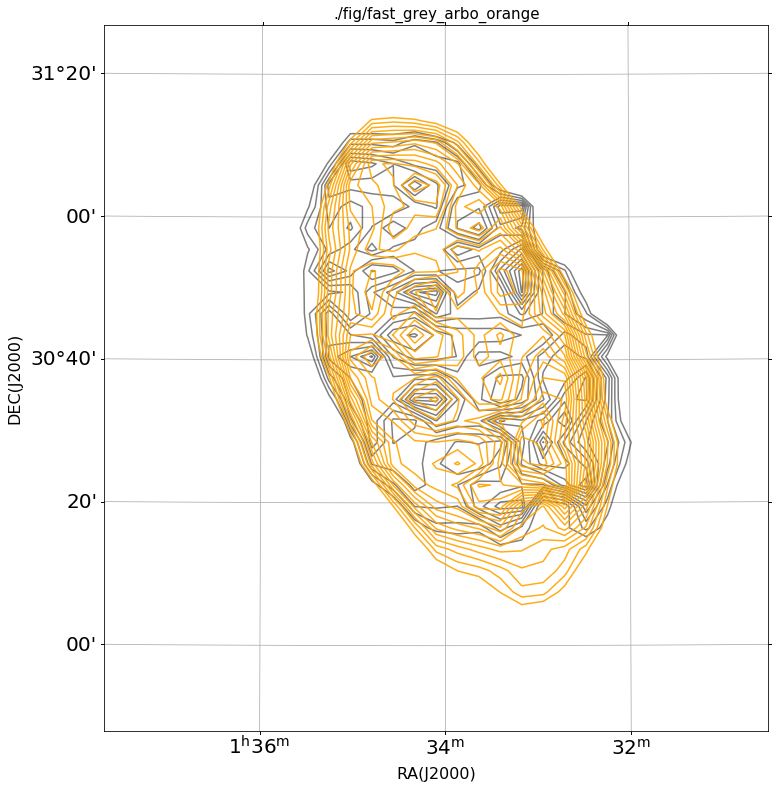

In [8]:
overlap_two_contours(fast,arbo,bklevels=flevels,folevels=alevels, radec_range = None,
                     alphabk=0.5,c='orange',picname='./fig/fast_grey_arbo_orange',save = False)

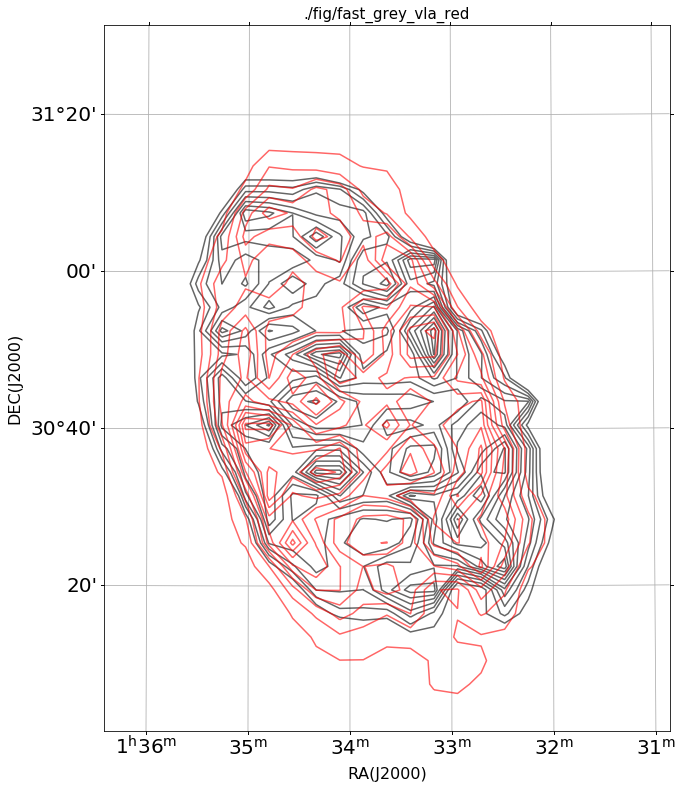

In [35]:
overlap_two_contours(fast,vla,bklevels=flevels,folevels=vlevels, radec_range =(22.7,24.1,30,31.5),
                     alphafo=0.6,c='red',picname='./fig/fast_grey_vla_red',save=False)

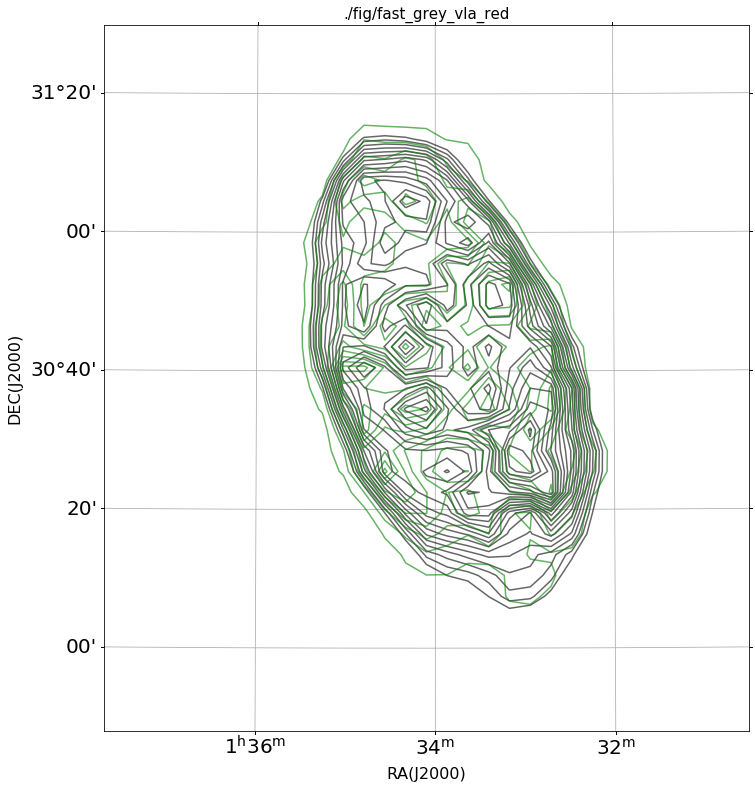

In [36]:
overlap_two_contours(arbo,vla,bklevels=alevels,folevels=vlevels,
                     alphafo=0.6,c='g',picname='./fig/fast_grey_vla_red',save=False)

In [37]:
fastm0=FitsPic('./data/fast_HI-moment0.fits')
fastm1=FitsPic('./data/fast_HI-moment1.fits')

In [39]:
overlap_img_contour(fastm1,fastm0,levels=np.linspace(100,1000,9),c='k',alpha=0.6,
                     picname='./fig/fast_m0_m1',save = False)

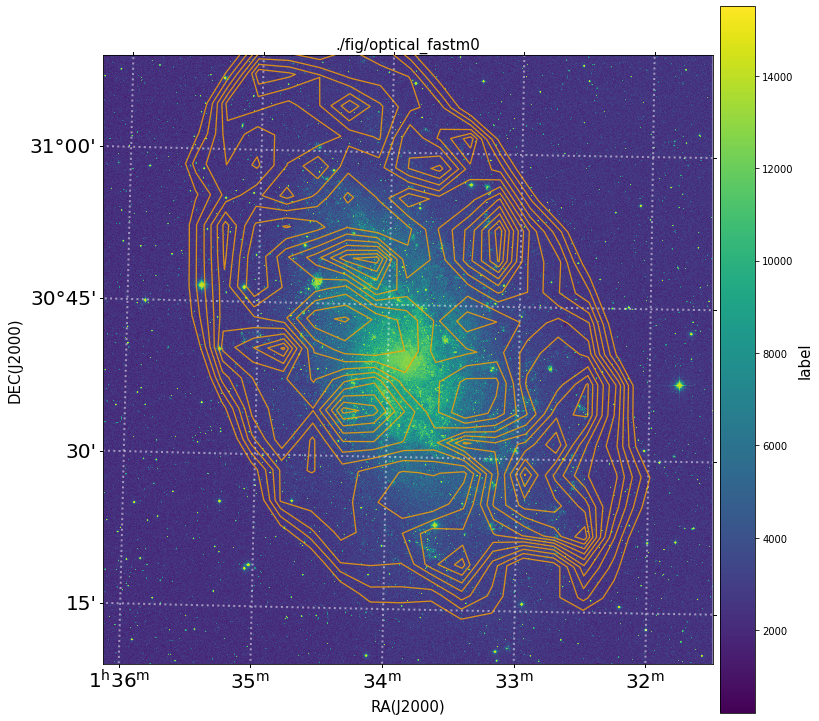

In [40]:
overlap_img_contour(optical,fastm0,levels=flevels,picname='./fig/optical_fastm0',save = False)

In [41]:
#标记峰值点，感觉不常用
two_contours_with_peaks(fast,arbo,min_distance=2,bklevels=flevels,folevels=alevels,
                        alphabk=0.4,picname='./data/fast_grey_arbo_pink',save = False)

INFO:  The first you input(bk =) is background.The second you input(fo =) is foreround. When comparing these two, the valley floor positions are less accurate than the peaks,          because their gradient is smaller. [hiviewer.core]
